# Data Science MNIST Dataset

In [ ]:
!pip install idx2numpy
!pip install pandas

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import gzip
import idx2numpy

### Load "yann.lecun" Data

In [2]:
train_images_dir = r"C:\Users\rgs88\OneDrive\Documents\Semester 1 Data Science MSc Projects\mnist\train-images-idx3-ubyte.gz"
train_labels_dir = r"C:\Users\rgs88\OneDrive\Documents\Semester 1 Data Science MSc Projects\mnist\train-labels-idx1-ubyte.gz"

test_images_dir = r"C:\Users\rgs88\OneDrive\Documents\Semester 1 Data Science MSc Projects\mnist\t10k-images-idx3-ubyte.gz"
test_labels_dir = r"C:\Users\rgs88\OneDrive\Documents\Semester 1 Data Science MSc Projects\mnist\t10k-labels-idx1-ubyte.gz"

### Convert Data to .csv format

In [ ]:
# Read dataset files using idx2numpy
train_images = idx2numpy.convert_from_file(train_images_dir)
train_labels = idx2numpy.convert_from_file(train_labels_dir)
test_images = idx2numpy.convert_from_file(test_images_dir)
test_labels = idx2numpy.convert_from_file(test_labels_dir)

# Flatten image data
train_images_flattened = train_images.reshape(train_images.shape[0], -1)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)

# Create DataFrame for training data
train_data = pd.DataFrame(data=train_images_flattened)
train_data['label'] = train_labels

# Create DataFrame for testing data
test_data = pd.DataFrame(data=test_images_flattened)
test_data['label'] = test_labels

# Save DataFrames as CSV files
train_data.to_csv(r"C:\Users\rgs88\OneDrive\Documents\Semester 1 Data Science MSc Projects\Machine Learning\ML_Retake\mnist_train.csv", index=False)
test_data.to_csv(r"C:\Users\rgs88\OneDrive\Documents\Semester 1 Data Science MSc Projects\Machine Learning\ML_Retake\mnist_test.csv", index=False)

print("CSV files saved successfully.")

In [3]:
mnist_train = pd.read_csv(r"C:\Users\rgs88\OneDrive\Documents\Semester 1 Data Science MSc Projects\Machine Learning\ML_Retake\mnist_train.csv")
mnist_test = pd.read_csv(r"C:\Users\rgs88\OneDrive\Documents\Semester 1 Data Science MSc Projects\Machine Learning\ML_Retake\mnist_test.csv")

In [4]:
mnist_train.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
def display_array(array_2d):
    plt.imshow(array_2d, cmap='gray')  # Use a grayscale colormap
    plt.colorbar()  # Add a colorbar to the side
    plt.show()

In [12]:
x = mnist_train.values

In [13]:
X_train[0]

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]], dtype=int64)

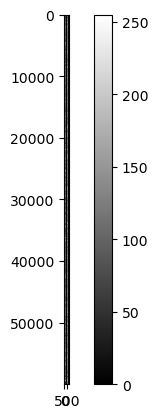

In [11]:
display_array(mnist_train.values)

In [19]:
X_train_array = X_train.to_numpy()

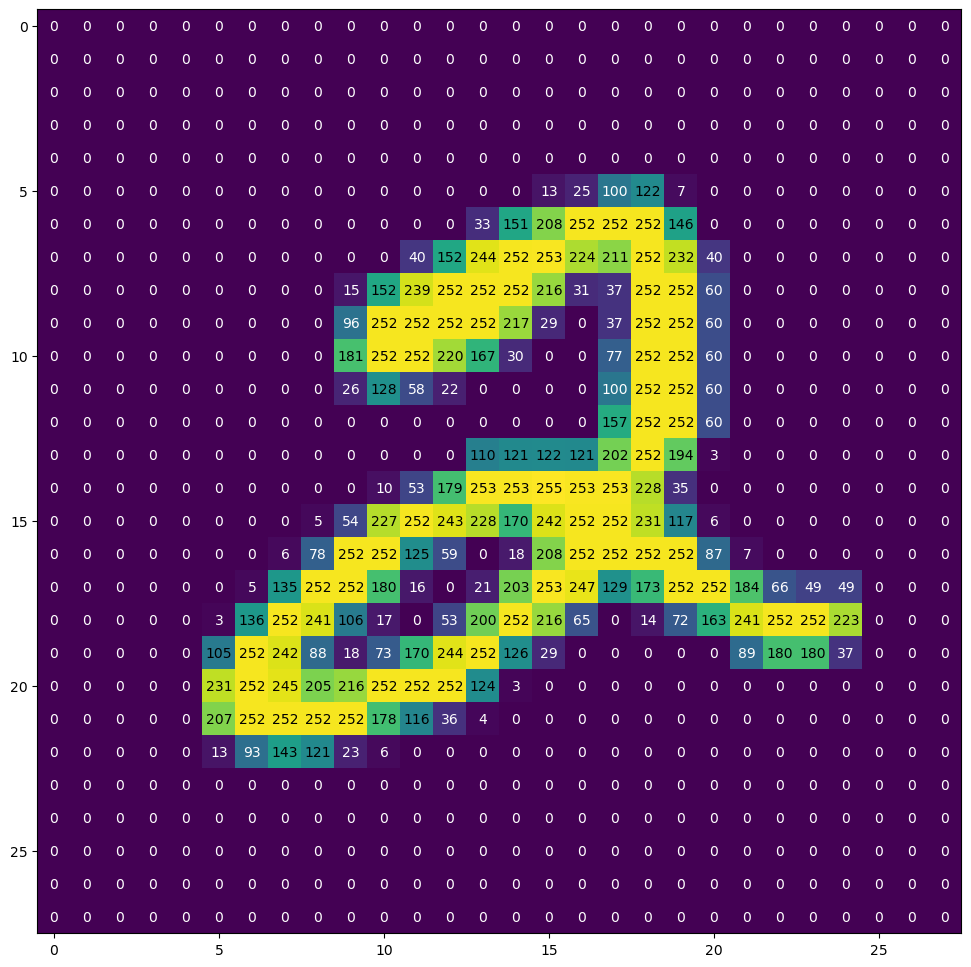

In [34]:
img = X_train_array[5].reshape(28, 28)  # Reshape to a 2D array

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

# Change the colormap to a different one, e.g., 'viridis'
ax.imshow(img, cmap='viridis')  # You can use any other valid colormap

width, height = img.shape
thresh = img.max() / 2.5

for x in range(width):
    for y in range(height):
        val = round(img[x][y], 2) if img[x][y] != 0 else 0
        ax.annotate(str(val), xy=(y, x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y] < thresh else 'black')

plt.show()

In [16]:
X_train = mnist_train.drop(columns = ["label"], axis = 1)
y_train = mnist_train["label"]

X_test = mnist_test.drop(columns = ["label"], axis = 1)
y_test = mnist_test["label"]

In [17]:
y_train.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

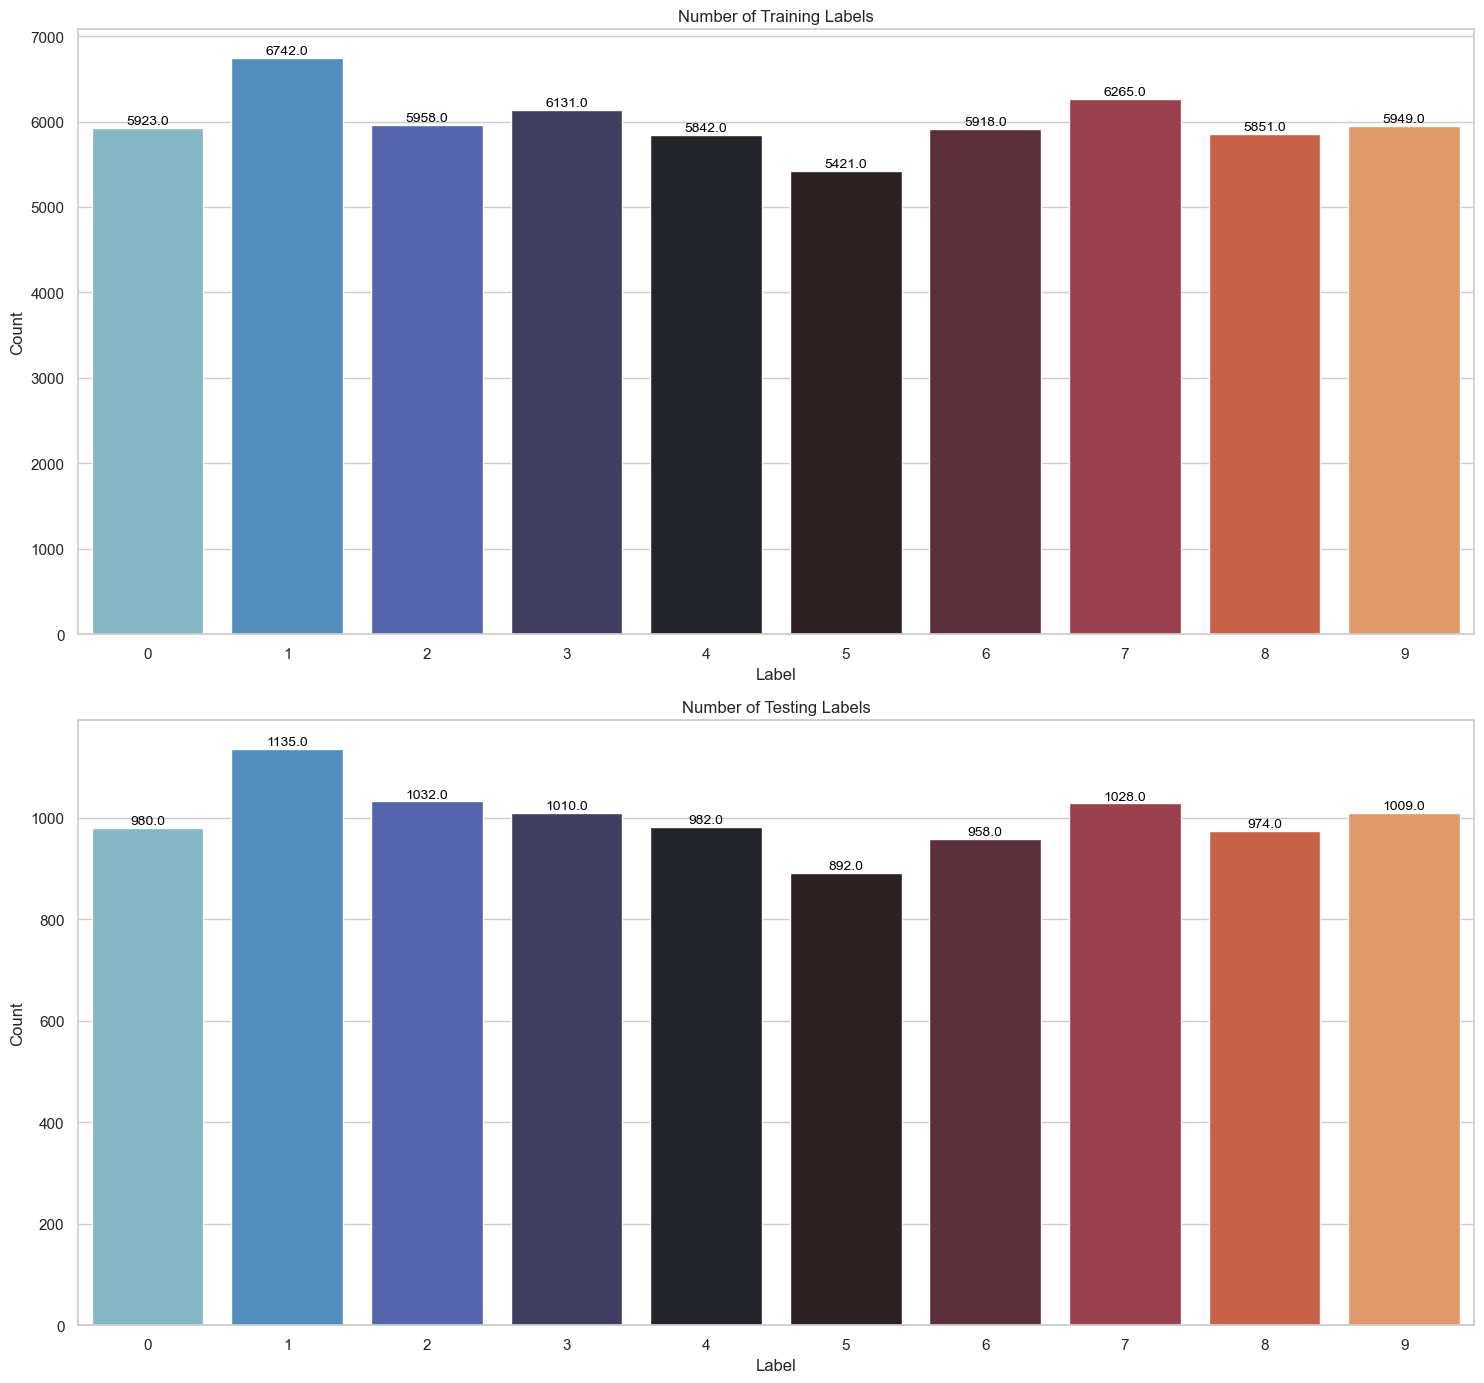

In [35]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(15, 14))

# Subplot 1: Training Labels Count Plot
plt.subplot(2, 1, 1)
sns.countplot(x=y_train, palette="icefire")
plt.title("Number of Training Labels")
plt.xlabel("Label")
plt.ylabel("Count")
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

# Subplot 2: Testing Labels Count Plot
plt.subplot(2, 1, 2)
sns.countplot(x=y_test, palette="icefire")
plt.title("Number of Testing Labels")
plt.xlabel("Label")
plt.ylabel("Count")
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.tight_layout()
plt.show()


In [36]:
labels = np.concatenate((y_train, y_test), axis=0)

label_data = pd.DataFrame(labels, columns = ["label"])
label_data

,label
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [37]:
x_label = label_data.value_counts()
x_label

label
1        7877
7        7293
3        7141
2        6990
9        6958
0        6903
6        6876
8        6825
4        6824
5        6313
dtype: int64

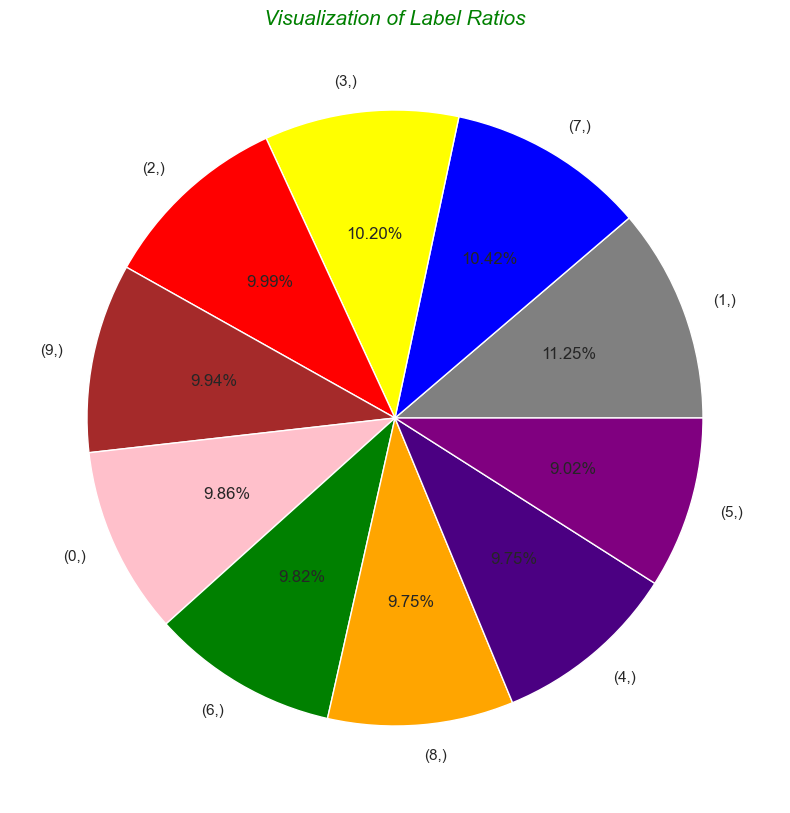

In [38]:
x_label = label_data.value_counts()
colors = ["grey","blue","yellow","red","brown","pink","green","orange","indigo","purple"]
explode = [0,0,0,0,0,0,0,0,0,0]
sizes = x_label.values

plt.figure(figsize = (10,10))
plt.pie(sizes ,explode = explode, labels = x_label.index, colors = colors, autopct = "%.2f%%")
plt.title("Visualization of Label Ratios", color = "green", fontsize = 15, fontstyle = "italic")
plt.show()

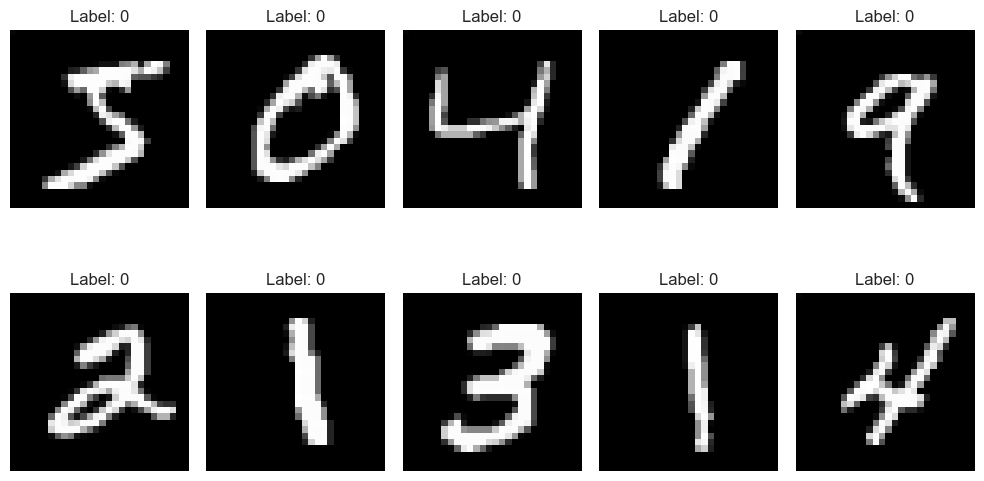

In [39]:
# Define the dimensions of the images
image_height = 28
image_width = 28

# Number of images to display
num_images = 10

# Create a subplot grid
fig, axes = plt.subplots(2, 5, figsize=(10, 6))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Iterate through the specified number of images
for i in range(num_images):
    row = mnist_train.iloc[i]
    pixel_values = row.iloc[:-1].values  # Exclude the last column (label)
    label = row.iloc[-1]  # Get the label from the last column

    image = pixel_values.reshape(image_height, image_width)

    # Display the image in the subplot
    axes[i].imshow(image, cmap='gray')  # 'gray' colormap for grayscale images
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')  # Turn off axes ticks and labels

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [41]:
# Export DataFrames to CSV files
X_train.to_csv(r"C:\Users\rgs88\OneDrive\Documents\Semester 1 Data Science MSc Projects\Machine Learning\ML_Retake\X_train.csv", index=False)
y_train.to_csv(r"C:\Users\rgs88\OneDrive\Documents\Semester 1 Data Science MSc Projects\Machine Learning\ML_Retake\y_train.csv", index=False)
X_test.to_csv(r"C:\Users\rgs88\OneDrive\Documents\Semester 1 Data Science MSc Projects\Machine Learning\ML_Retake\X_test.csv", index=False)
y_test.to_csv(r"C:\Users\rgs88\OneDrive\Documents\Semester 1 Data Science MSc Projects\Machine Learning\ML_Retake\y_test.csv", index=False)

In [42]:
confusion_matrix1 = np.array([
    [98, 0, 1, 2, 0, 4, 0, 0, 2, 0],
    [0, 114, 0, 0, 0, 0, 1, 0, 6, 0],
    [3, 0, 80, 5, 3, 0, 1, 2, 2, 0],
    [2, 1, 5, 89, 0, 5, 0, 1, 5, 0],
    [0, 1, 0, 1, 74, 1, 3, 1, 1, 6],
    [1, 0, 0, 7, 2, 57, 3, 1, 11, 1],
    [1, 0, 0, 0, 1, 2, 88, 0, 2, 0],
    [0, 0, 1, 1, 3, 1, 0, 88, 1, 13],
    [3, 2, 5, 1, 2, 5, 3, 1, 76, 2],
    [3, 0, 1, 2, 4, 1, 1, 3, 2, 78]
])

# Calculate precision, recall, and F1-score for each class
precision = np.diag(confusion_matrix1) / confusion_matrix1.sum(axis=0)
recall = np.diag(confusion_matrix1) / confusion_matrix1.sum(axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the metrics for each class
for i in range(10):
    print(f"Class {i}:")
    print(f"Precision: {precision[i]:.4f}")
    print(f"Recall: {recall[i]:.4f}")
    print(f"F1-Score: {f1_score[i]:.4f}")
    print("=" * 20)

Class 0:
Precision: 0.8829
Recall: 0.9159
F1-Score: 0.8991
Class 1:
Precision: 0.9661
Recall: 0.9421
F1-Score: 0.9540
Class 2:
Precision: 0.8602
Recall: 0.8333
F1-Score: 0.8466
Class 3:
Precision: 0.8241
Recall: 0.8241
F1-Score: 0.8241
Class 4:
Precision: 0.8315
Recall: 0.8409
F1-Score: 0.8362
Class 5:
Precision: 0.7500
Recall: 0.6867
F1-Score: 0.7170
Class 6:
Precision: 0.8800
Recall: 0.9362
F1-Score: 0.9072
Class 7:
Precision: 0.9072
Recall: 0.8148
F1-Score: 0.8585
Class 8:
Precision: 0.7037
Recall: 0.7600
F1-Score: 0.7308
Class 9:
Precision: 0.7800
Recall: 0.8211
F1-Score: 0.8000


In [44]:
# Calculate average precision and recall
average_precision = np.mean(precision)
average_recall = np.mean(recall)
average_f1_score = np.mean(f1_score)
# Print average precision and recall
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1_score:.4f}")

Average Precision: 0.8386
Average Recall: 0.8375
Average F1 Score: 0.8373


In [46]:


confusion_matrix = np.array([
    [105, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 114, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 4, 100, 0, 0, 0, 0, 2, 1, 0],
    [0, 1, 0, 95, 0, 2, 0, 2, 2, 1],
    [0, 2, 0, 0, 79, 0, 4, 1, 0, 3],
    [1, 1, 0, 4, 0, 78, 0, 1, 0, 0],
    [3, 0, 0, 0, 0, 0, 89, 0, 0, 0],
    [1, 4, 0, 0, 1, 0, 0, 98, 0, 2],
    [2, 1, 0, 5, 3, 2, 0, 2, 87, 2],
    [2, 1, 0, 1, 1, 0, 0, 2, 0, 86]
])

# Calculate precision, recall, and F1-score for each class
precision = np.diag(confusion_matrix) / confusion_matrix.sum(axis=0)
recall = np.diag(confusion_matrix) / confusion_matrix.sum(axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate average precision and recall
average_precision = np.mean(precision)
average_recall = np.mean(recall)
average_f1_score = np.mean(f1_score)

# Print the metrics for each class
for i in range(10):
    print(f"Class {i}:")
    print(f"Precision: {precision[i]:.4f}")
    print(f"Recall: {recall[i]:.4f}")
    print(f"F1-Score: {f1_score[i]:.4f}")
    print("=" * 20)

# Print average precision and recall
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1-Score: {average_f1_score:.4f}")

Class 0:
Precision: 0.9130
Recall: 0.9906
F1-Score: 0.9502
Class 1:
Precision: 0.8906
Recall: 1.0000
F1-Score: 0.9421
Class 2:
Precision: 1.0000
Recall: 0.9259
F1-Score: 0.9615
Class 3:
Precision: 0.9048
Recall: 0.9223
F1-Score: 0.9135
Class 4:
Precision: 0.9405
Recall: 0.8876
F1-Score: 0.9133
Class 5:
Precision: 0.9512
Recall: 0.9176
F1-Score: 0.9341
Class 6:
Precision: 0.9468
Recall: 0.9674
F1-Score: 0.9570
Class 7:
Precision: 0.9074
Recall: 0.9245
F1-Score: 0.9159
Class 8:
Precision: 0.9667
Recall: 0.8365
F1-Score: 0.8969
Class 9:
Precision: 0.9149
Recall: 0.9247
F1-Score: 0.9198
Average Precision: 0.9336
Average Recall: 0.9297
Average F1-Score: 0.9304


## Other Work

In [ ]:
with gzip.open(train_images_dir, "r") as file:
    # Read the content of the file
    image_size = 28
    num_images = 60000
    content = file.read(image_size * image_size * num_images)
    data = np.frombuffer(content, dtype=np.uint8).astype(np.float32)
    data = data.reshape(num_images, image_size, image_size, 1)

# Open the gzipped file in binary mode
with gzip.open(train_labels_dir, "r") as file:
    # Read the content of the file
    num_labels = 60000
    content = file.read(num_labels)
    labels = np.frombuffer(content, dtype=np.uint8).astype(np.int64)

# Process the labels as needed
# For example, you can print the length of the labels
print(len(labels))

In [ ]:
image_size = 28
num_images = 10  # Select 10 images to display
with gzip.open(train_images_dir, "r") as file:
    content = file.read(image_size * image_size * num_images)
    data = np.frombuffer(content, dtype=np.uint8).astype(np.float32)
    images = data.reshape(num_images, image_size, image_size)

# Read the labels
num_labels = 10  # Corresponding labels for the 10 images
with gzip.open(train_labels_dir, "r") as file:
    content = file.read(num_labels)
    labels = np.frombuffer(content, dtype=np.uint8).astype(np.int64)

# Display the images
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
with gzip.open(test_images_dir, "r") as file:
    # Read the content of the file
    image_size = 28
    num_images = 10000
    content = file.read(image_size * image_size * num_images)
    data = np.frombuffer(content, dtype=np.uint8).astype(np.float32)
    data = data.reshape(num_images, image_size, image_size, 1)    
    
# Open the gzipped file in binary mode
with gzip.open(test_labels_dir, "r") as file:
    # Read the content of the file
    num_labels = 10000
    content = file.read(num_labels)
    labels = np.frombuffer(content, dtype=np.uint8).astype(np.int64)

# Process the labels as needed
# For example, you can print the length of the labels
print(len(labels))

In [ ]:
# Count the occurrences of each label
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Plot the bar graph
plt.bar(unique_labels, label_counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts in MNIST Dataset')
plt.xticks(unique_labels)
plt.show()